# Analyse du jeu de données concernant l'étude sur les primes d'assurance

## Importation des librairies et du jeu de données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st

data = pd.read_csv("dataset_cleaned.csv")

Rappel concernant le jeu de données :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Analyses univariées

### Variable "age"

In [25]:
data["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Pour visualiser la variable "age" dans un graphique, il faut agréger les valeurs en classes de plusieurs tranches d'âges.

In [10]:
age_range = [
    {"category": "18-24", "range": [18, 24]},
    {"category": "25-34", "range": [25, 34]},
    {"category": "35-44", "range": [35, 44]},
    {"category": "45-54", "range": [45, 54]},
    {"category": "55-64", "range": [55, 64]},
]

age_count = []
for age in data["age"]:
    for range in age_range:
        if age >= range["range"][0] and age <= range["range"][1]:
            age_count.append(range["category"])
            continue

data["age_range"] = age_count

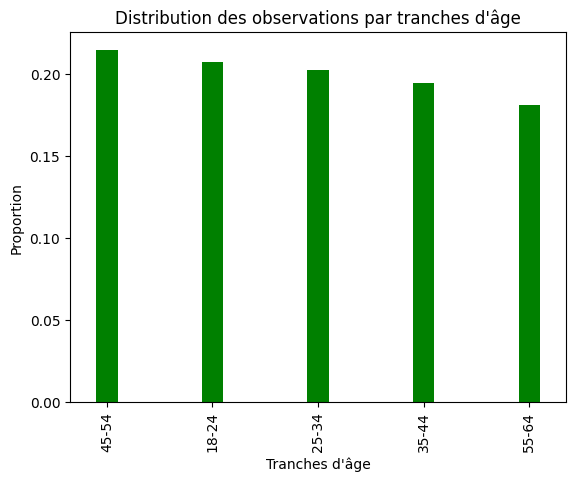

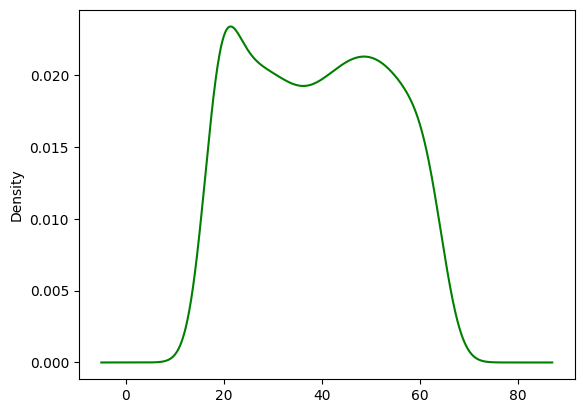

In [19]:
data["age_range"].value_counts(normalize=True).plot(kind="bar", color="green", width=0.2)
plt.title("Distribution des observations par tranches d'âge")
plt.xlabel("Tranches d'âge")
plt.ylabel("Proportion")
plt.show()

data["age"].plot.kde(color="green")
plt.show()

On remarque que la proportion de chaque classe est proche de 20% au sein de cet échantillon.

### Variable "sex"

### Variable "bmi"

In [26]:
data["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

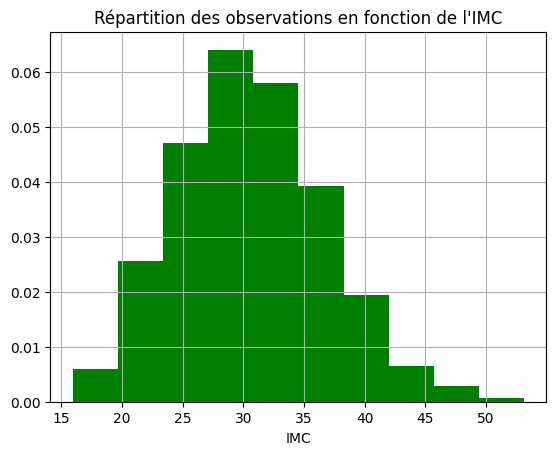

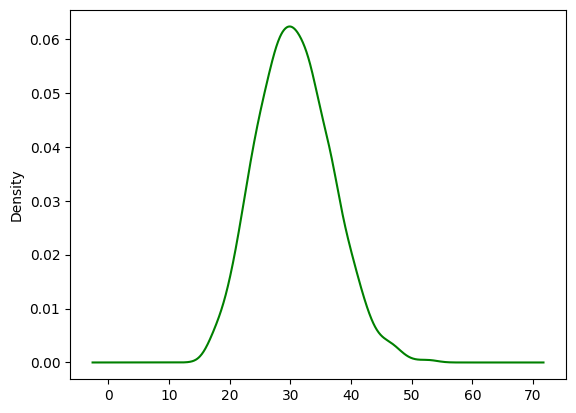

In [15]:
data["bmi"].hist(density=True, color="green")
plt.title("Répartition des observations en fonction de l'IMC")
plt.xlabel("IMC")
plt.show()

data["bmi"].plot.kde(color="green")
plt.show()

Pour visualiser la variable "bmi" différement dans un graphique, on peut agréger les valeurs en classes représentées par les différentes catégories de l'IMC.

In [11]:
bmi_scale = [
    {"category": "Underweight", "range": [float("-inf"), 18.499]},
    {"category": "Healthy weight", "range": [18.5, 24.999]},
    {"category": "Overweight", "range": [25, 29.999]},
    {"category": "Obesity class I", "range": [30, 34.999]},
    {"category": "Obesity class II", "range": [35, 39.999]},
    {"category": "Obesity class III", "range": [40, float("inf")]},
]

bmi_count = []
for bmi in data["bmi"]:
    for group in bmi_scale:
        if bmi >= group["range"][0] and bmi <= group["range"][1]:
            bmi_count.append(group["category"])
            continue

data["bmi_groups"] = bmi_count

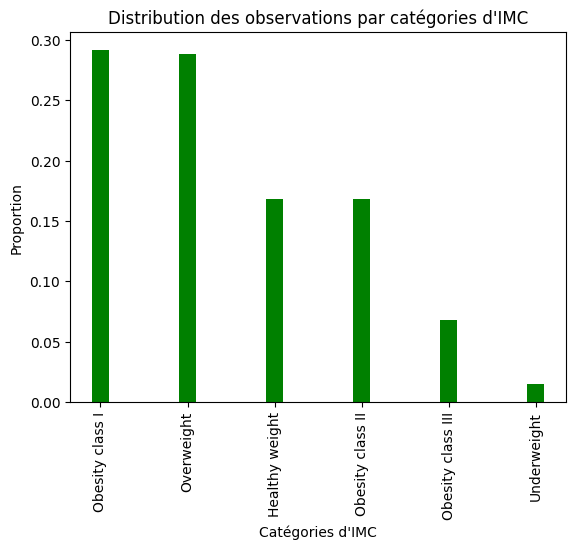

In [13]:
data["bmi_groups"].value_counts(normalize=True).plot(kind="bar", color="green", width=0.2)
plt.title("Distribution des observations par catégories d'IMC")
plt.xlabel("Catégories d'IMC")
plt.ylabel("Proportion")
plt.show()

On remarque une plus forte proportion d'observations dans les classes "Obésité Classe 1" et "Surpoids" que dans les autres.

In [20]:
groups = data["bmi_groups"].value_counts()
modalities = groups.index

tab = pd.DataFrame(modalities, columns=["bmi_groups"])
tab["n"] = groups.values
tab["f"] = tab["n"] / len(data)
tab["F"] = tab["f"].cumsum()

display(tab)

,bmi_groups,n,f,F
0,Obesity class I,390,0.291698,0.291698
1,Overweight,386,0.288706,0.580404
2,Healthy weight,225,0.168287,0.748691
3,Obesity class II,225,0.168287,0.916978
4,Obesity class III,91,0.068063,0.985041
5,Underweight,20,0.014959,1.000000


Lorsque l'on regarde les fréquences cumulées, les catégories "Obésité classe 1" et "Surpoids" représente 58% du jeu de données.

### Variable "children"

### Variable "smoker"

### Variable "region"

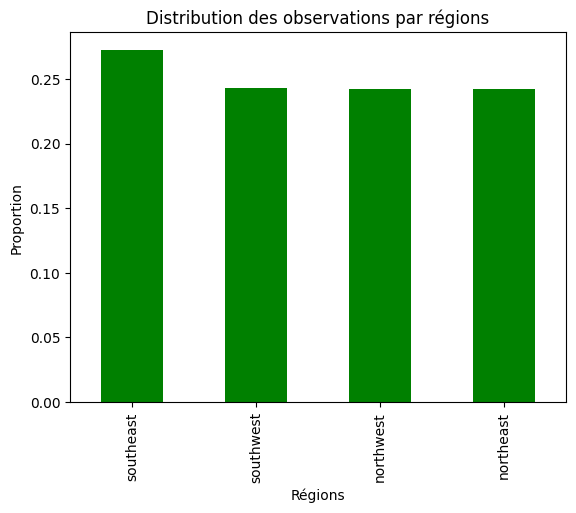

In [9]:
data["region"].value_counts(normalize=True).plot(kind="bar", color="green")
plt.title("Distribution des observations par régions")
plt.xlabel("Régions")
plt.ylabel("Proportion")
plt.show()

La proportion de chaque région est proche de 25% dans ce jeu de données.

### Variable "charges"

## Etude de la corrélation des variables avec la variable cible "charges"

### Analyse corrélation des variables "age" et "charges"

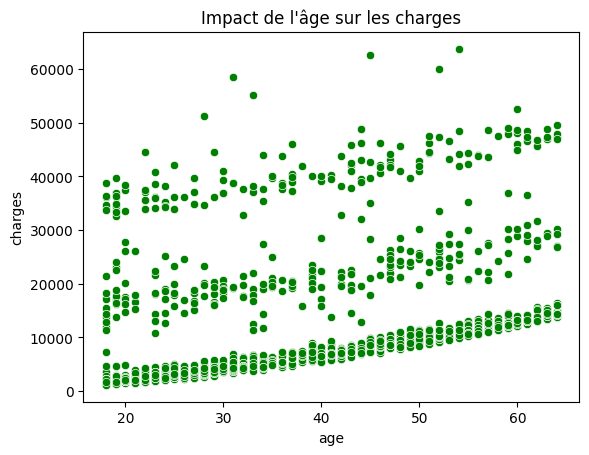

In [29]:
sns.scatterplot(x=data["age"], y=data["charges"], color="green")
plt.title("Impact de l'âge sur les charges")
plt.show()

Pour ce graphique on remarque que que les observations sont divisées en trois groupes d'intervales de charges. On peut également dire que plus l'age augmente, plus les charges augmentent également.

Il est probable qu'une autre variable explique le passage dans l'un des groupes d'intervales supérieures.

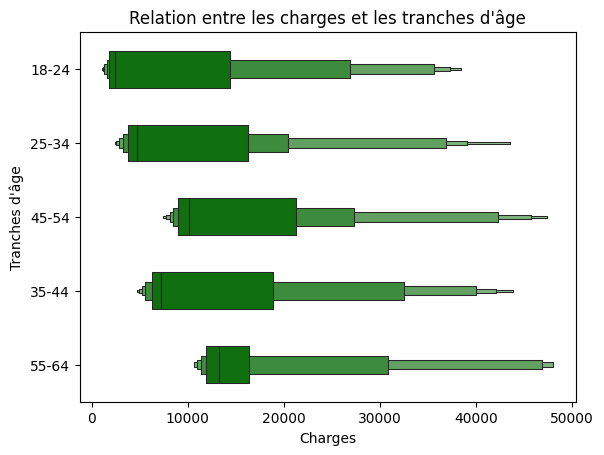

In [45]:
sns.boxenplot(x="charges", y="age_range", data=data, color="green", width=0.5, showfliers=False)
plt.title("Relation entre les charges et les tranches d'âge")
plt.ylabel("Tranches d'âge")
plt.xlabel("Charges")
plt.show()

Sur ce graphique on note bien que plus une observation fait partie d'une tranche d'âge élevé, plus elle aura des charges élevés.

In [47]:
print("Coefficient de Pearson : ", st.pearsonr(data["age"], data["charges"])[0])

Coefficient de Pearson :  0.2983082125097863


### Analyse corrélation des variables "sex" et "charges"

### Analyse corrélation des variables "bmi" et "charges"

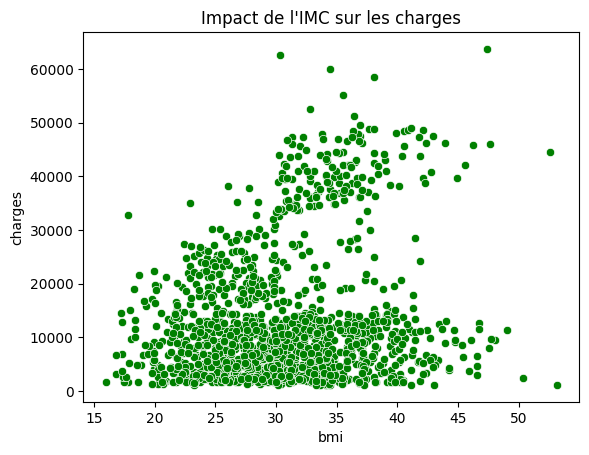

In [48]:
sns.scatterplot(x=data["bmi"], y=data["charges"], color="green")
plt.title("Impact de l'IMC sur les charges")
plt.show()

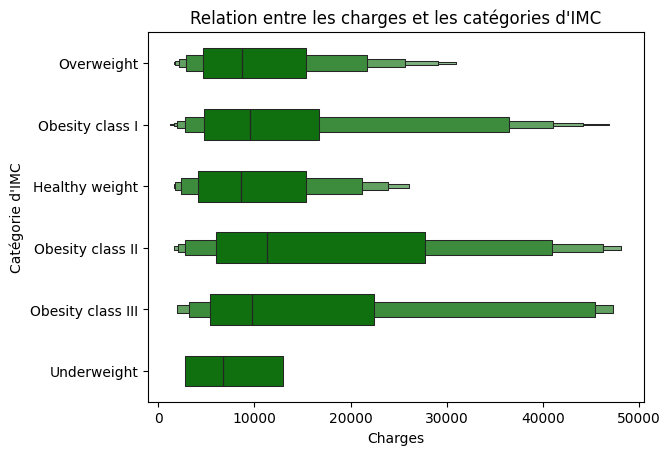

In [50]:
sns.boxenplot(x="charges", y="bmi_groups", data=data, color="green", width=0.5, showfliers=False)
plt.title("Relation entre les charges et les catégories d'IMC")
plt.ylabel("Catégorie d'IMC")
plt.xlabel("Charges")
plt.show()

In [49]:
print("Coefficient de Pearson : ", st.pearsonr(data["bmi"], data["charges"])[0])

Coefficient de Pearson :  0.1984008312262494


### Analyse corrélation des variables "children" et "charges"

### Analyse corrélation des variables "smoker" et "charges"

### Analyse corrélation des variables "region" et "charges"

## Analyses bivariées

### Analyse corrélation des variables "age" et "bmi"

#### Exploration graphique 

#### Test statistique

### Analyse corrélation des variables "age" et "smoker"

#### Exploration graphique 

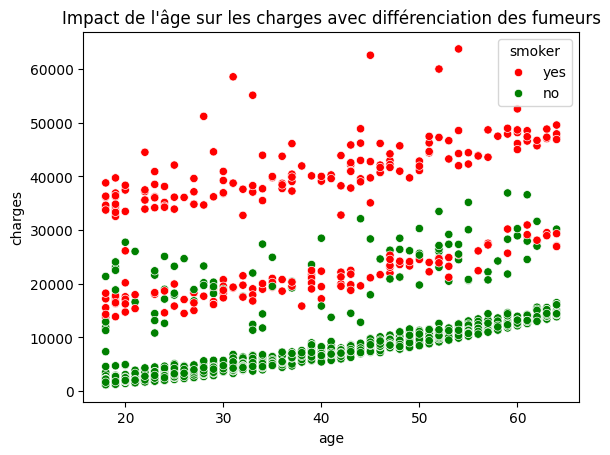

In [54]:
sns.scatterplot(x=data["age"], y=data["charges"], hue=data["smoker"], palette={"no": "green", "yes": "red"})
plt.title("Impact de l'âge sur les charges avec différenciation des fumeurs")
plt.show()

#### Test statistique

### Analyse corrélation des variables "bmi" et "smoker"

#### Exploration graphique 

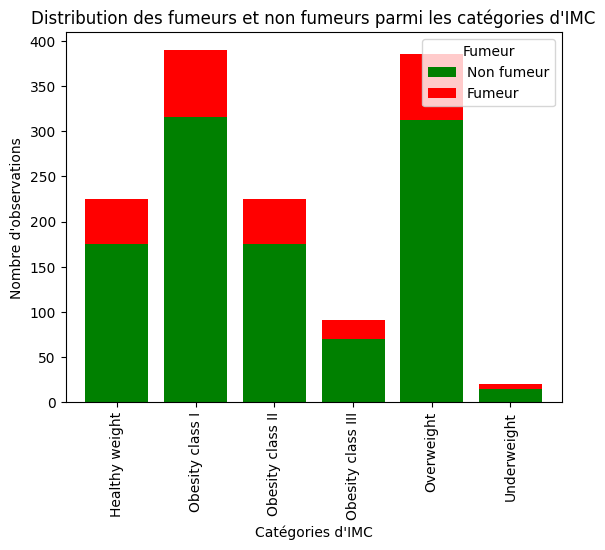

In [77]:
count_data = data.groupby(['bmi_groups', 'smoker']).size().unstack()

count_data.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)

plt.title("Distribution des fumeurs et non fumeurs parmi les catégories d'IMC")
plt.xlabel("Catégories d'IMC")
plt.ylabel("Nombre d'observations")
plt.legend(title="Fumeur", labels=["Non fumeur", "Fumeur"], loc='upper right')
plt.show()

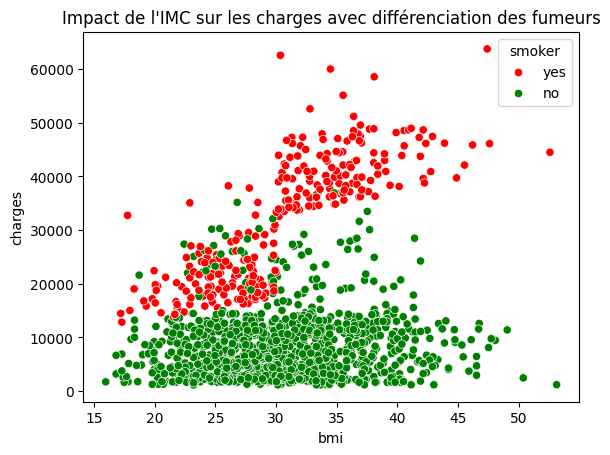

In [63]:
sns.scatterplot(x=data["bmi"], y=data["charges"], hue=data["smoker"], palette={"no": "green", "yes": "red"})
plt.title("Impact de l'IMC sur les charges avec différenciation des fumeurs")
plt.show()

#### Test statistique

In [78]:
cont = pd.crosstab(
    data["bmi_groups"],
    data["smoker"],
    margins=True,
    margins_name="total",
)

display(cont)

smoker,no,yes,total
bmi_groups,,,
Healthy weight,175,50,225
Obesity class I,316,74,390
Obesity class II,175,50,225
Obesity class III,70,21,91
Overweight,312,74,386
Underweight,15,5,20
total,1063,274,1337


In [79]:
chi2, p, tmp, tmp1 = st.chi2_contingency(cont)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 2.4141148308361418
P-value: 0.9984552024333331


### Analyse corrélation des variables "bmi" et "region"

#### Exploration graphique 

#### Test statistique

### Analyse corrélation des variables "smoker" et "region"

#### Exploration graphique 

#### Test statistique